# PART 2

In [1]:
from sklearn.datasets import make_swiss_roll,make_moons
import numpy as np

X , color  = make_swiss_roll(n_samples=2000 , noise=0.05 , random_state= np.random.randint(0,100))

x,y = make_moons(n_samples=2000 , noise=0.05 , random_state= np.random.randint(0,100))

In [37]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)


In [47]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=300).fit_transform(X)


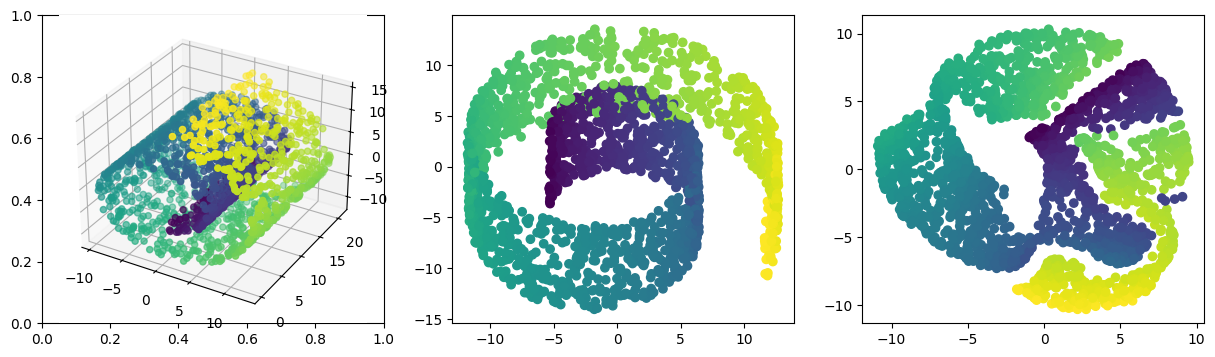

In [52]:
import matplotlib.pyplot as plt

fig , axes = plt.subplots(1,3,figsize=(15,4))

axes[0] = plt.subplot(131 , projection = '3d')
axes[0].scatter(X[:,0] , X[:,1] , X[:,2] , c = color , cmap = 'viridis' )
axes[1].scatter(X_pca[:,0] , X_pca[:,1]  , c = color , cmap = 'viridis' , label = 'PCA')
axes[2].scatter(X_embedded[:,0] , X_embedded[:,1] ,  c = color , cmap = 'viridis' , label = 't-SNE')
plt.show()

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)


In [45]:
from sklearn.manifold import TSNE
x_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=300).fit_transform(x)


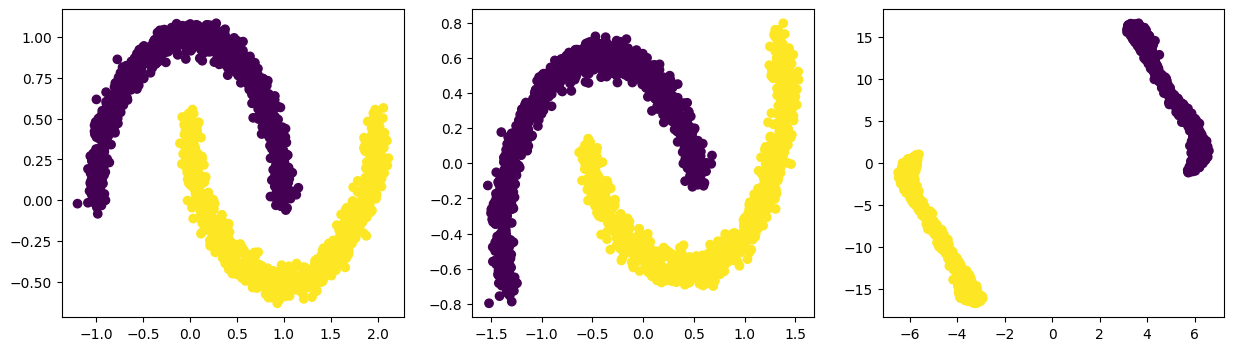

In [46]:
import matplotlib.pyplot as plt

fig , axes = plt.subplots(1,3,figsize=(15,4))

axes[0].scatter(x[:,0] , x[:,1] ,c = y , cmap = 'viridis')
axes[1].scatter(x_pca[:,0] , x_pca[:,1]  , c = y , cmap = 'viridis')
axes[2].scatter(x_embedded[:,0] , x_embedded[:,1] ,  c = y , cmap = 'viridis')
plt.show()

# PART 1

<!-- Frequent Itemset Mining -->
Tasks:
1. Remove rows where Item = ’NONE’ and remove duplicate transactions.
2. Transform the data into a one-hot encoded binary matrix (rows = trans-
actions, columns = items).
3. Generate frequent itemsets using the Apriori algorithm with min support
= 0.02.
4. Sort the itemsets in descending order of support.5. Visualize the top 15 frequent itemsets using a horizontal bar chart:
• x-axis = support
• y-axis = itemsets

In [68]:
import pandas as pd

df = pd.read_csv('BreadBasket_DMS.csv')
df=df.dropna(axis=1)
df=df[df['Item'] != 'NONE']
df=df.drop_duplicates()



In [70]:
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [72]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns


transactions = df.groupby('Transaction')['Item'].apply(list).reset_index(name='Item')['Item']

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_onehot, min_support=0.02, use_colnames=True)



In [73]:
frequent_itemsets 


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [75]:
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)


In [76]:
frequent_itemsets_sorted

,support,itemsets
4,0.478394,(Coffee)
1,0.327205,(Bread)
16,0.142631,(Tea)
3,0.103856,(Cake)
20,0.090016,"(Bread, Coffee)"
11,0.086107,(Pastry)
12,0.071844,(Sandwich)
9,0.061807,(Medialuna)
7,0.058320,(Hot chocolate)
23,0.054728,"(Cake, Coffee)"


/tmp/ipykernel_7055/3921514871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_15_itemsets['itemsets_str'] = top_15_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))


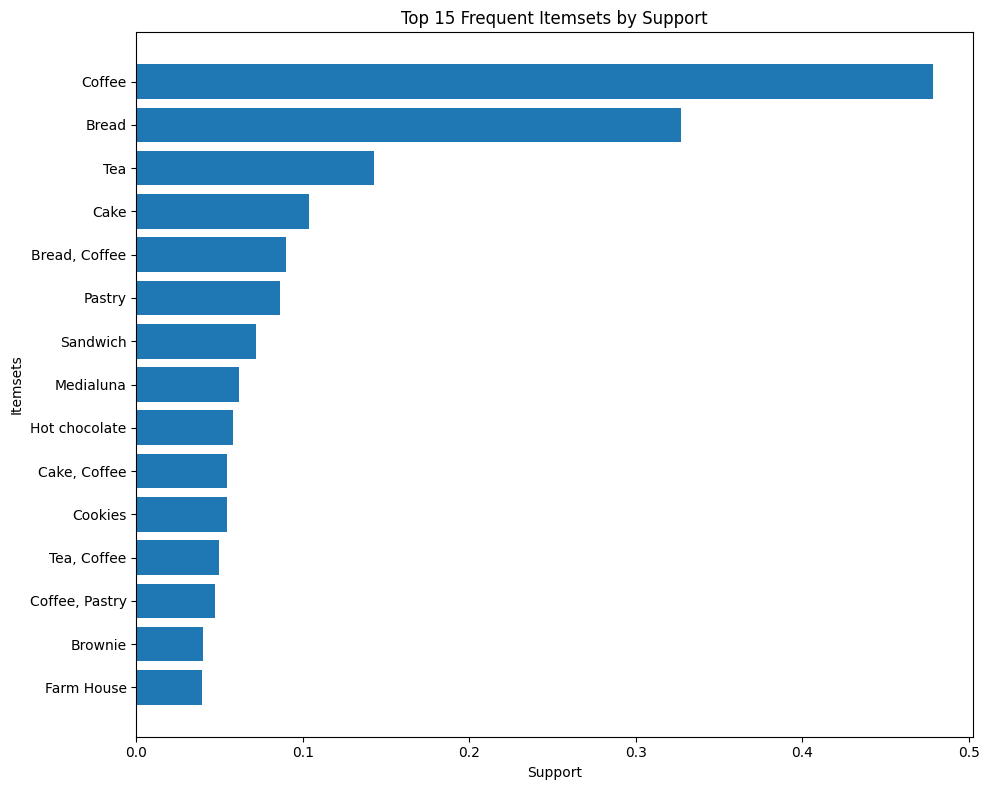

In [104]:
top_15_itemsets = frequent_itemsets_sorted.head(15)

top_15_itemsets['itemsets_str'] = top_15_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
top_15_itemsets = top_15_itemsets.sort_values(by = 'support' , ascending = True)

val = list(top_15_itemsets['support'])
item = list(top_15_itemsets['itemsets_str'])

plt.figure(figsize=(10, 8))
plt.barh(range(len(val)) , val)
plt.yticks(range(len(val)) , item)
plt.title('Top 15 Frequent Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.tight_layout()
plt.show()

<!-- 2. Association Rule Generation -->
Tasks:
1. Generate association rules using confidence as the metric with a minimum
threshold of 0.3.
2. Sort the rules in descending order of confidence.
3. Display the top 10 rules with columns: antecedents, consequents, support,
confidence, lift.
4. Visualize the rules using a scatter plot:
• x-axis = support
• y-axis = confidence
• Include proper title and labels to assess rule strength

In [106]:
frequent_itemsets = pd.DataFrame(frequent_itemsets)


In [108]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets , metric="confidence",min_threshold=0.3)

In [109]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,1.0,0.000985,1.017305,0.036980,0.075908,0.017011,0.213884
1,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
2,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707
3,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,1.0,0.001683,1.058553,0.060403,0.058333,0.055314,0.284542
4,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,1.0,0.002154,1.119919,0.108738,0.041507,0.107078,0.288656
5,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
6,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
7,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150
8,(Tea),(Coffee),0.142631,0.478394,0.049868,0.349630,0.730840,1.0,-0.018366,0.802014,-0.300482,0.087310,-0.246862,0.226935
9,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936


In [111]:
rules = rules.sort_values(by='confidence' , ascending = False)

In [112]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
9,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
5,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
6,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
4,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,1.0,0.002154,1.119919,0.108738,0.041507,0.107078,0.288656
7,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150
1,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
2,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707
3,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,1.0,0.001683,1.058553,0.060403,0.058333,0.055314,0.284542
8,(Tea),(Coffee),0.142631,0.478394,0.049868,0.349630,0.730840,1.0,-0.018366,0.802014,-0.300482,0.087310,-0.246862,0.226935
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,1.0,0.000985,1.017305,0.036980,0.075908,0.017011,0.213884


In [116]:
rules[['antecedents', 'consequents' , 'support' , 'confidence' , 'lift']]

,antecedents,consequents,support,confidence,lift
9,(Toast),(Coffee),0.023666,0.704403,1.472431
5,(Medialuna),(Coffee),0.035182,0.569231,1.189878
6,(Pastry),(Coffee),0.047544,0.552147,1.154168
4,(Juice),(Coffee),0.020602,0.534247,1.116750
7,(Sandwich),(Coffee),0.038246,0.532353,1.112792
1,(Cake),(Coffee),0.054728,0.526958,1.101515
2,(Cookies),(Coffee),0.028209,0.518447,1.083723
3,(Hot chocolate),(Coffee),0.029583,0.507246,1.060311
8,(Tea),(Coffee),0.049868,0.349630,0.730840
0,(Pastry),(Bread),0.029160,0.338650,1.034977


In [133]:
rules['itemsets_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))

labels = list(rules['itemsets_str'])
print(labels)

['Toast', 'Medialuna', 'Pastry', 'Juice', 'Sandwich', 'Cake', 'Cookies', 'Hot chocolate', 'Tea', 'Pastry']


In [142]:
rules['itemsets_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

labels2 = list(rules['itemsets_str'])
print(labels2)

['Coffee', 'Coffee', 'Coffee', 'Coffee', 'Coffee', 'Coffee', 'Coffee', 'Coffee', 'Coffee', 'Bread']


In [143]:
ll = []

for i in range(10):
    ll.append((labels[i] , labels2[i]))

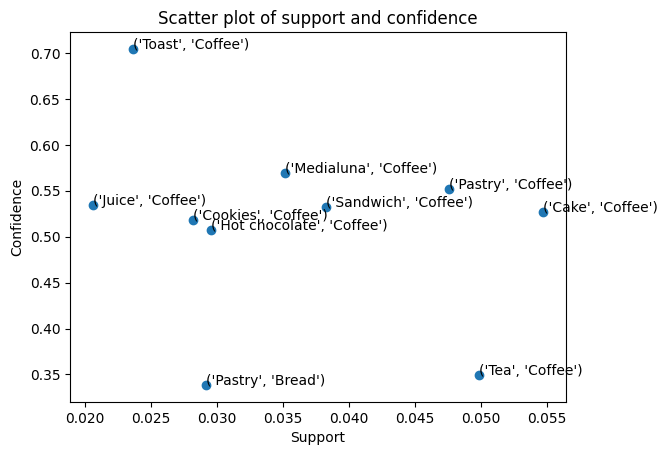

In [144]:
plt.scatter(rules['support'] , rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Scatter plot of support and confidence')

for i in range(10):
    plt.text(rules['support'].iloc[i] , rules['confidence'].iloc[i] ,ll[i] )

plt.show()